<a href="https://colab.research.google.com/github/jjonhwa/DeepLearning.AI-TensorFlow/blob/main/26_NLP_Week4_Exercise_Shakespeare_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout, Bidirectional
from tensorflow.keras.models import  Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

import tensorflow.keras.utils as ku
import numpy as np

In [2]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
-O /tmp/sonnets.txt

data = open('/tmp/sonnets.txt').read()
corpus = data.lower().split('\n')

--2021-01-09 13:22:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 172.253.122.128, 172.217.164.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2021-01-09 13:22:06 (89.4 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in corpus :
  token_list = tokenizer.texts_to_sequences([line])[0]

  for i in range(1, len(token_list)) :
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [4]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))

predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_words)

In [5]:
model= Sequential()
model.add(Embedding(total_words, 100, input_length = max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.1))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(total_words, activation = 'softmax'))

adam = Adam(lr = .01)
model.compile(loss = 'categorical_crossentropy',
              optimizer = adam,
              metrics = ['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [7]:
history = model.fit(
    predictors,
    label,
    epochs = 100,
    verbose = 1
)

Epoch 1/100
484/484 [==============================] - 15s 12ms/step - loss: 7.0854 - acc: 0.0241
Epoch 2/100
484/484 [==============================] - 6s 12ms/step - loss: 6.5146 - acc: 0.0224
Epoch 3/100
484/484 [==============================] - 6s 11ms/step - loss: 6.4054 - acc: 0.0276
Epoch 4/100
484/484 [==============================] - 6s 12ms/step - loss: 6.3609 - acc: 0.0282
Epoch 5/100
484/484 [==============================] - 5s 11ms/step - loss: 6.3103 - acc: 0.0299
Epoch 6/100
484/484 [==============================] - 6s 12ms/step - loss: 6.2775 - acc: 0.0338
Epoch 7/100
484/484 [==============================] - 5s 11ms/step - loss: 6.2441 - acc: 0.0349
Epoch 8/100
484/484 [==============================] - 5s 11ms/step - loss: 6.2088 - acc: 0.0338
Epoch 9/100
484/484 [==============================] - 5s 11ms/step - loss: 6.1503 - acc: 0.0320
Epoch 10/100
484/484 [==============================] - 6s 11ms/step - loss: 6.1124 - acc: 0.0413
Epoch 11/100
484/484 [======

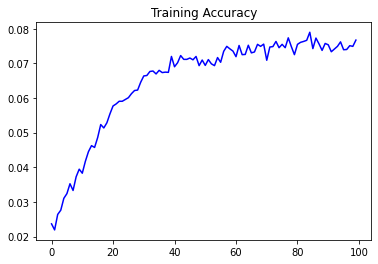

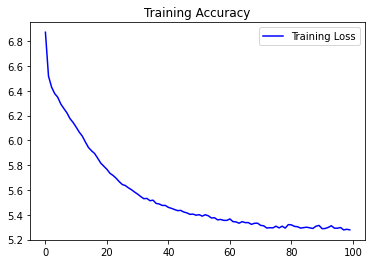

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.title('Training Accuracy')

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.title('Training Accuracy')

plt.legend()
plt.show()

In [13]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 50

for _ in range(next_words) :
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen = max_sequence_len -1, padding = 'pre')
  predicted = model.predict_classes(token_list, verbose = 0)
  output_word = ""

  for word, index in tokenizer.word_index.items() :
    if index == predicted :
      output_word = word
      break

  seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Help me Obi Wan Kenobi, you're my only hope and all my love is i am so to be so to be so to be so to be so to be so to be so to be so to be so to be so to be so to be so to be so to be so to be so
